In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('sales_store_2_item_28.csv')
df.head()

,date,sales
0,2013-01-01,12
1,2013-01-02,16
2,2013-01-03,16
3,2013-01-04,20
4,2013-01-05,16


In [4]:
df['date']=pd.to_datetime(df['date'])
df_time = df.set_index('date')
df_time.head()

,sales
date,
2013-01-01,12
2013-01-02,16
2013-01-03,16
2013-01-04,20
2013-01-05,16


In [7]:
ts=df_time['sales'].resample('MS').sum()
ts.head()

date
2013-01-01    486
2013-02-01    480
2013-03-01    686
2013-04-01    743
2013-05-01    843
Freq: MS, Name: sales, dtype: int64

<AxesSubplot:xlabel='date'>

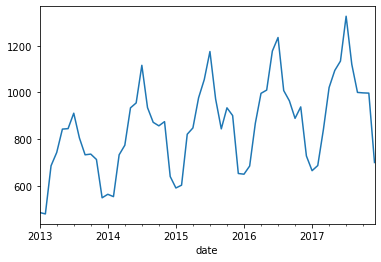

In [8]:
ts.plot()

## Check for stationarity

In [9]:
import statsmodels.api as sm

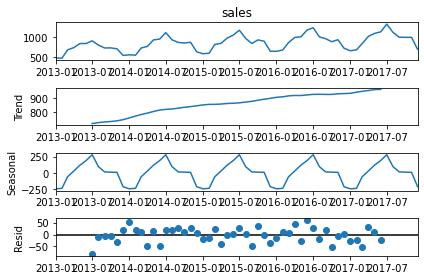

In [11]:
decomposition= sm.tsa.seasonal_decompose(ts,model='additive')
fig=decomposition.plot(figsize=(10,7))
plt.show()

In [12]:
from statsmodels.tsa.stattools import adfuller

In [13]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [14]:
adfuller_test(ts)

ADF Test Statistic : -2.7573594241050636
p-value : 0.06462753412557923
#Lags Used : 11
Number of Observations Used : 48
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


### split the data set

<AxesSubplot:xlabel='date'>

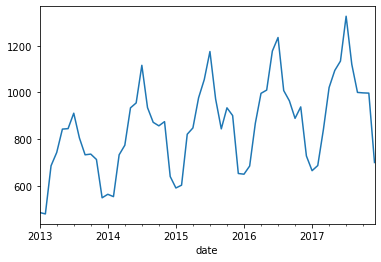

In [16]:
ts.plot()

In [15]:
len(ts)

60

In [17]:
train=ts[:48]
test=ts[48:]

## ARIMA Model building

In [23]:
# How to get ARIMa hyperparameters p d q ?

p=range(0,8)
q=range(0,8)
d=range(0,2)

In [24]:
import itertools

pdq_combination=list(itertools.product(p,d,q))
len(pdq_combination)

128

In [25]:
from sklearn.metrics import mean_absolute_error

In [26]:
MAE=[]
order1=[]

for pdq in pdq_combination:
    try:
        model=ARIMA(train,order=pdq).fit()
        pred=model.predict(start=len(train),end=len(ts)-1)
        error=mean_absolute_error(test,pred)
        order1.append(pdq)
        MAE.append(error)
    except:
        continue

In [28]:
results= pd.DataFrame(index=order1,data=MAE,columns=['MAE'])

In [32]:
results['MAE'].sort_values()

(3, 0, 3)    129.685984
(5, 0, 3)    131.064156
(2, 0, 6)    131.863436
(3, 0, 4)    137.676991
(2, 0, 4)    139.213224
(2, 0, 2)    158.705919
(2, 0, 3)    162.104737
(7, 0, 0)    174.983398
(5, 0, 0)    185.025694
(6, 0, 0)    185.193881
(4, 0, 1)    192.151840
(3, 0, 1)    194.691958
(4, 0, 2)    194.798905
(4, 0, 0)    196.847715
(0, 0, 3)    196.979324
(2, 0, 1)    197.238253
(0, 0, 2)    198.876330
(3, 0, 0)    199.362841
(1, 0, 2)    200.469193
(0, 0, 1)    201.899612
(1, 0, 3)    205.329081
(2, 0, 0)    208.810126
(0, 0, 4)    213.598243
(0, 0, 7)    215.655726
(1, 0, 4)    216.060653
(0, 0, 5)    217.224672
(1, 0, 1)    219.176129
(1, 0, 5)    219.838046
(1, 0, 0)    226.281371
(0, 0, 6)    239.299687
(1, 0, 7)    253.261188
(2, 0, 7)    261.032958
(6, 0, 1)    261.642058
(7, 0, 1)    295.252452
(1, 1, 6)    935.994429
(0, 1, 5)    938.176676
(0, 1, 6)    938.920846
(0, 1, 3)    939.043622
(6, 1, 0)    947.416481
(5, 1, 0)    949.075679
(7, 1, 0)    951.960124
(3, 1, 6)    954

In [20]:
from statsmodels.tsa.arima_model import ARIMA

In [34]:
model= ARIMA(train,order=(3,0,3)).fit()

## Predict test dataset

In [35]:
pred=model.predict(start=len(train),end=len(ts)-1)

## Model evaluation

In [47]:
from sklearn.metrics import mean_absolute_error

In [45]:
mae=mean_absolute_error(pred,test)
print('MAE: %.3f' % mae)

MAE: 129.686


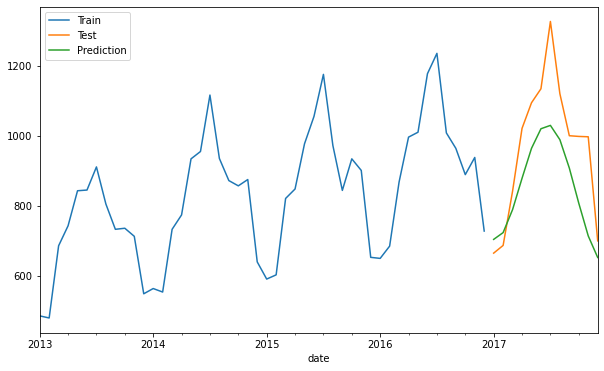

In [39]:
train.plot(legend=True,label='Train',figsize=(10,6))
test.plot(legend=True,label='Test')
pred.plot(legend=True,label='Prediction')
plt.show()

## Predict future data

In [40]:
final_model=ARIMA(ts,order=(3,0,3)).fit()

In [43]:
prediction =final_model.predict(len(ts),len(ts)+6)

<AxesSubplot:xlabel='date'>

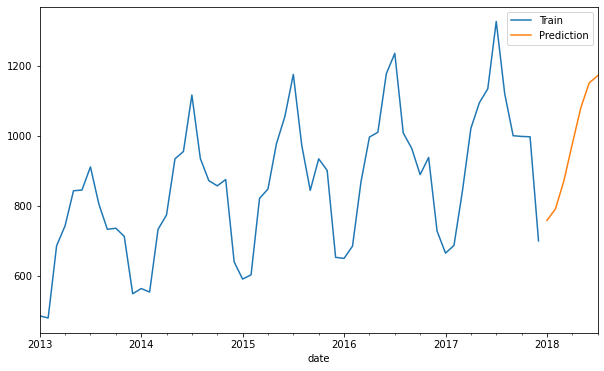

In [44]:
ts.plot(legend=True,label='Train',figsize=(10,6))
prediction.plot(legend=True,label='Prediction')